In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [2]:
!dir

 Volume in drive C is Local Disk
 Volume Serial Number is 8471-B1A1

 Directory of c:\Users\kirti\OneDrive\SpringBoard\SpringBoard_DataScience_Career\CapstoneProject2

10/26/2020  01:15 AM    <DIR>          .
10/26/2020  01:15 AM    <DIR>          ..
10/26/2020  01:13 AM         1,228,369 Capstone 2 - NLP (1) (1).ipynb
10/25/2020  09:22 PM           126,512 Capstone 2 - NLP.ipynb
10/26/2020  01:14 AM         1,603,630 Capstone 2old - NLP (1).ipynb
10/25/2020  09:22 PM           345,279 Final LDA Model 31Aug2020.pkl
10/25/2020  09:22 PM           252,308 logs.log
10/25/2020  09:22 PM    <DIR>          mlruns
               5 File(s)      3,556,098 bytes
               3 Dir(s)  12,618,391,552 bytes free


## Dataset

Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazon’s iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website.

The data is available in TSV files in the amazon-reviews-pds S3 bucket in AWS US East Region. Each line in the data files corresponds to an individual review (tab delimited, with no quote and escape characters)

### DATA COLUMNS:


| Column Name | Description |
| ------------| --------|
| marketplace | 2 letter country code of the marketplace where the review was written.|
| customer_id |Random identifier that can be used to aggregate reviews written by a single author.|
| review_id   | The unique ID of the review.|
| product_id  | The unique Product ID the review pertains to. In the multilingual dataset the reviews.for the same product in different countries can be grouped by the same product_id.|
| product_parent | Random identifier that can be used to aggregate reviews for the same product.|
| product_title  | Title of the product.|
| product_category |Broad product category that can be used to group reviews.|
                    (also used to group the dataset into coherent parts).
| star_rating |The 1-5 star rating of the review.|
| helpful_votes |Number of helpful votes.|
| total_votes |  Number of total votes the review received.|
| vine | Review was written as part of the Vine program.|
| verified_purchase| The review is on a verified purchase.|
| review_headline | The title of the review.|
| review_body | The review text.|
| review_date |The date the review was written.|



### DATA FORMAT
Tab ('\t') separated text file, without quote or escape characters.
First line in each file is header; 1 line corresponds to 1 record.

### US REVIEWS DATASET
**Electronics Category** : https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Electronics_v1_00.tsv.gz

In [3]:
DATA_HOME="C:/Users/kirti/Downloads/AmazonReviewData/"
df_electronics = pd.read_csv(DATA_HOME +'amazon_reviews_us_Electronics_v1_00.tsv.gz', sep="\t", header=0, error_bad_lines=False)

b'Skipping line 9076: expected 15 fields, saw 22\nSkipping line 19256: expected 15 fields, saw 22\nSkipping line 24313: expected 15 fields, saw 22\nSkipping line 47211: expected 15 fields, saw 22\nSkipping line 54295: expected 15 fields, saw 22\nSkipping line 56641: expected 15 fields, saw 22\nSkipping line 63067: expected 15 fields, saw 22\n'
b'Skipping line 93796: expected 15 fields, saw 22\n'
b'Skipping line 132806: expected 15 fields, saw 22\nSkipping line 164631: expected 15 fields, saw 22\nSkipping line 167019: expected 15 fields, saw 22\nSkipping line 167212: expected 15 fields, saw 22\n'
b'Skipping line 198103: expected 15 fields, saw 22\nSkipping line 199191: expected 15 fields, saw 22\nSkipping line 202841: expected 15 fields, saw 22\nSkipping line 218228: expected 15 fields, saw 22\nSkipping line 235900: expected 15 fields, saw 22\n'
b'Skipping line 277761: expected 15 fields, saw 22\nSkipping line 304582: expected 15 fields, saw 22\nSkipping line 312029: expected 15 fields,

In [4]:
df_electronics.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


In [5]:
df_electronics['review_date'] = pd.to_datetime(df_electronics.review_date)

In [6]:
df_electronics.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


In [7]:
df_electronics.dtypes

marketplace                  object
customer_id                   int64
review_id                    object
product_id                   object
product_parent                int64
product_title                object
product_category             object
star_rating                   int64
helpful_votes                 int64
total_votes                   int64
vine                         object
verified_purchase            object
review_headline              object
review_body                  object
review_date          datetime64[ns]
dtype: object

## Monthly Trend of Review


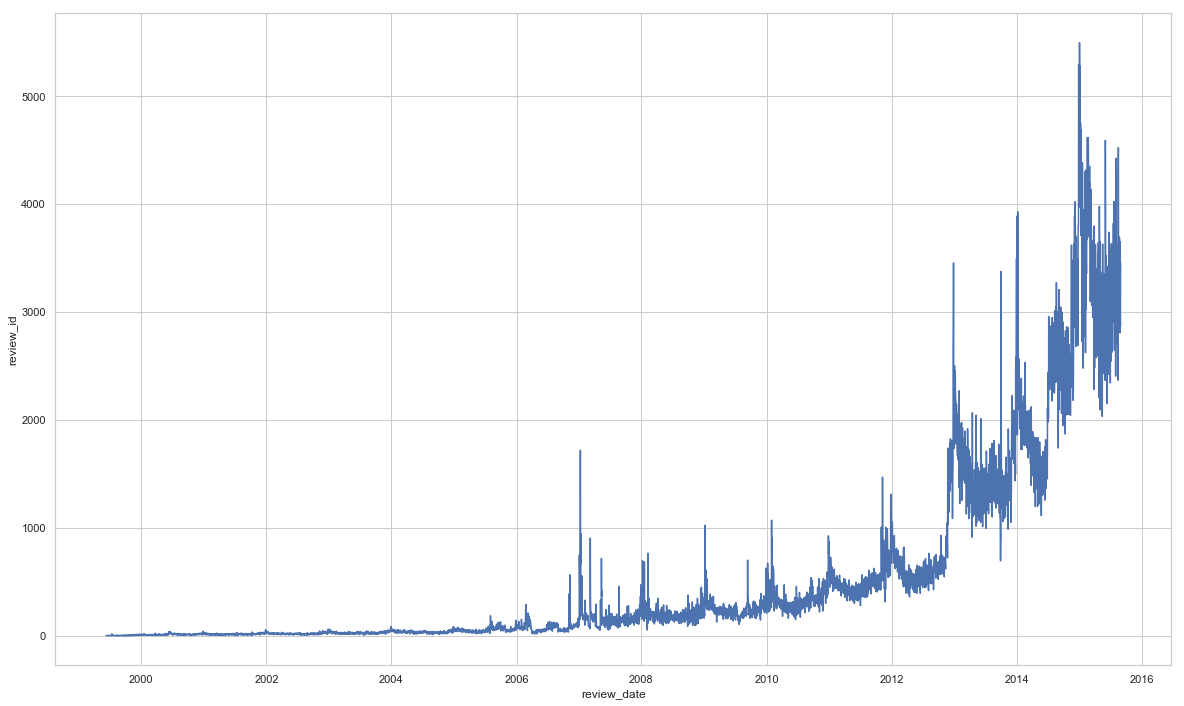

In [8]:
df_review_trend = df_electronics.groupby(['review_date'])['review_id'].count().reset_index()

f, ax = plt.subplots(figsize=(20, 12))

ax = sns.lineplot(x="review_date", y="review_id",
                  markers=True, dashes=False, data=df_review_trend)

## Count Per Review

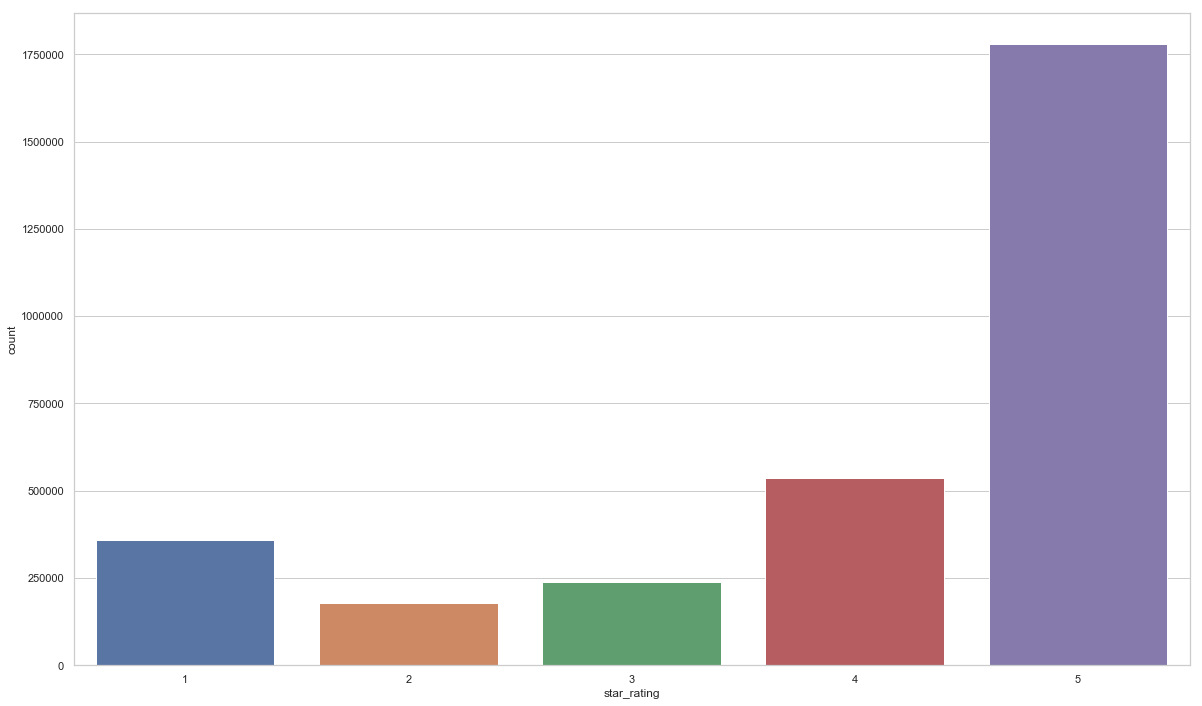

In [9]:
df_star_rating = df_electronics.groupby(['star_rating'])['review_id'].count()
df_star_rating = df_star_rating.to_frame(name='count').sort_values(by='count', ascending=False).reset_index()

f, ax = plt.subplots(figsize=(20, 12))

ax = sns.barplot(x="star_rating", y="count",data=df_star_rating)

## Data Preparation

### Check and Replace Null values

In [10]:
df_reviews = df_electronics[['review_id','customer_id','star_rating','review_headline','review_body']]
df_reviews.isnull().sum()

review_id           0
customer_id         0
star_rating         0
review_headline    31
review_body        88
dtype: int64

In [11]:
df_reviews = df_reviews.dropna()
df_reviews.isnull().sum()

review_id          0
customer_id        0
star_rating        0
review_headline    0
review_body        0
dtype: int64

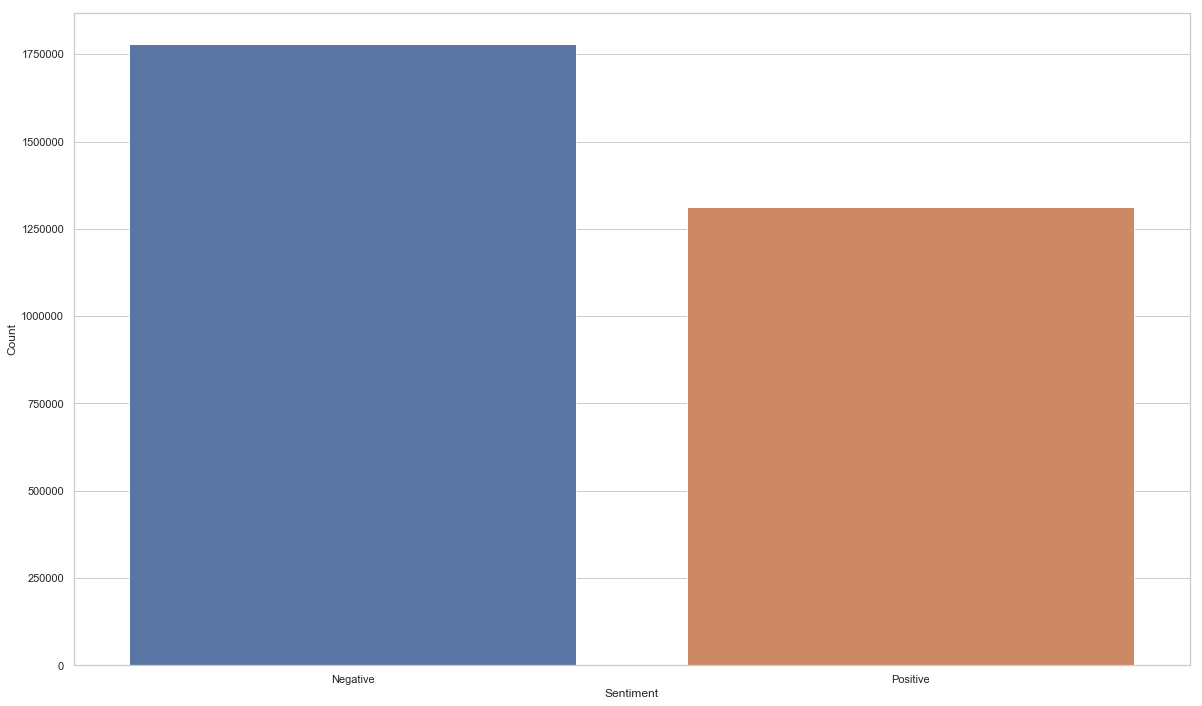

In [12]:
df_reviews['sentiment'] = df_reviews['star_rating'].apply(lambda x: 'Positive' if x <= 4 else 'Negative')

df_sentiments = df_reviews['sentiment'].value_counts().reset_index(name='Count').rename(columns={'index': 'Sentiment'})

f, ax = plt.subplots(figsize=(20, 12))

ax = sns.barplot(x="Sentiment", y="Count",data=df_sentiments)

### PyCaret

- Install PyCaret
- Load the data
- Setup environment
- Create model
- Assign Model
- Plot Model
- Save/Load Model

## Install PyCaret

Installing PyCaret in Local Jupyter Notebook

`pip install pycaret`

# Load the data

In [13]:
# sampling the data to select only 1000 documents
data = df_reviews.sample(1000, random_state=786).reset_index(drop=True)
data.shape

(1000, 6)

In [14]:
data=data.drop(['star_rating'], axis=1)
data.head()

,review_id,customer_id,review_headline,review_body,sentiment
0,R3FCHTWDX6M0NY,43758182,Five Stars,nice!,Negative
1,R1GNTVXZQMKWHW,30156333,as advertised,had to build custom boxes and this worked perf...,Negative
2,R1UXFD06PQXGF8,47478367,I need help!,The instructions are so difficult I cant get i...,Positive
3,RSPOKAESK9MEY,36856462,It's a battery.,It's a battery.,Negative
4,R25JSD0FT6NTJC,23678831,Replaiment,I have not uses it yet but I'm sure it will wo...,Positive


# Setup environment

- Removing numeric chanracters
- Removing special characters
- Word tokenization
- Stopword removal
- Bigram extraction
- Trigram Extraction
- Lemmatizing
- Custom Stopwords

In [15]:
from pycaret.nlp import *
exp_nlp101 = setup(data = data, target = 'review_body', session_id = 123)

Description,Value
session_id,123
Documents,1000
Vocab Size,3668
Custom Stopwords,False


Once the setup is succesfully executed it prints the information grid with the following information:

- session_id : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment session_id is set as 123 for later reproducibility.

- #Documents : Number of documents (or samples in dataset if dataframe is passed).

- Vocab Size : Size of vocabulary in the corpus after applying all text pre-processing such as removal of stopwords, bigram/trigram extraction, lemmatization etc.

In [16]:
#convert 'en' column of dataset into list format
text_list = list(data['review_body'])
type(text_list)

list

In [17]:
exp_nlp101_list = setup(data = text_list, session_id = 123)

Description,Value
session_id,123
Documents,1000
Vocab Size,3668
Custom Stopwords,False


# Create a Topic Model

A topic model is created using `create_model()` function which takes one mandatory parameter i.e. name of model as a string. This function returns a trained model object. There are 5 topic models available in PyCaret. see the docstring of `create_model()` for complete list of models. Below we are creating Latent Dirichlet Allocation (LDA) model

In [18]:
lda = create_model('lda')

In [19]:
print(lda)

LdaModel(num_terms=3668, num_topics=4, decay=0.5, chunksize=100)


In below example, we will create LDA model with 6 topics and we will also set `multi_core` parameter to `True`. When `multi_core` is set to `True` Latent Dirichlet Allocation (LDA) uses all CPU cores to parallelize and speed up model training.

In [20]:
lda2 = create_model('lda', num_topics = 6, multi_core = True)

In [21]:
print(lda2)

LdaModel(num_terms=3668, num_topics=6, decay=0.5, chunksize=100)


# Assign a Model

Now that we have created a topic model, we would like to assign the topic proportions to our dataset (6818 documents / samples) to analyze the results. We will achieve this by using `assign_model()` function

In [22]:
lda_results = assign_model(lda2)
lda_results.head()

,en,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Dominant_Topic,Perc_Dominant_Topic
0,nice,0.084559,0.083421,0.084086,0.083336,0.581160,0.083438,Topic 4,0.58
1,build custom box work perfectly cover good qua...,0.256289,0.013002,0.012931,0.013013,0.012992,0.691773,Topic 5,0.69
2,instruction difficult work make sound sit shel...,0.018714,0.018572,0.344967,0.018706,0.018684,0.580357,Topic 5,0.58
3,battery,0.084761,0.580441,0.083490,0.083335,0.083482,0.084489,Topic 1,0.58
4,use sure work come clean,0.028045,0.027932,0.027987,0.027885,0.860174,0.027978,Topic 4,0.86


Notice how 6 additional columns are now added to the dataframe. `review_body` is the text after all pre-processing. `Topic_0 ... Topic_3` are the topic proportions and represents the distribution of topics for each document. `Dominant_Topic` is the topic number with highest proportion and `Perc_Dominant_Topic` is the percentage of dominant topic over 1 (only shown when models are stochastic i.e. sum of all proportions equal to 1) .

# Plot Model

`plot_model()` function can be used to analyze the overall corpus or only specific topics extracted through topic model. Hence the function `plot_model()` can also work without passing any trained model object

## Frequency Distribution of Entire Corpus

In [23]:
plot_model()

## Top 100 Bigrams on Entire Corpus

In [24]:
plot_model(plot = 'bigram')

## Frequency Distribution of Topic 1

In [25]:
plot_model(lda2, plot = 'frequency', topic_num = 'Topic 1')

## Topic Distribution

In [26]:
plot_model(lda2, plot = 'topic_distribution')

Each document is a distribution of topics and not a single topic. Although, if the task is of categorizing document into specific topics, it wouldn't be wrong to use the topic proportion with highest value to categorize the document into a topic. In above plot, each document is categorized into one topic using the largest proportion of topic weights. We can see most of the documents are in `Topic 2`.

## T-distributed Stochastic Neighbor Embedding (t-SNE)

In [27]:
plot_model(lda2, plot = 'tsne')

T-distributed Stochastic Neighbor Embedding (t-SNE) is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions.

## Uniform Manifold Approximation and Projection Plot

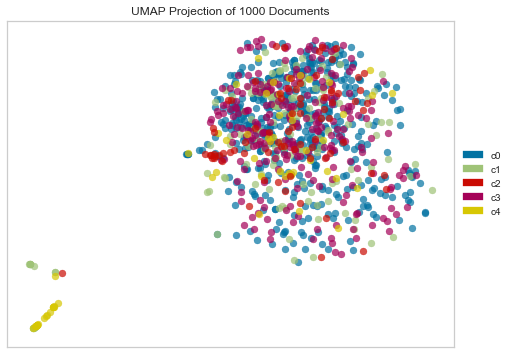

In [28]:
plot_model(lda2, plot = 'umap')

UMAP (Uniform Manifold Approximation and Projection) is a novel manifold learning technique for dimensionality reduction. It is similar to tSNE and PCA in its purpose as all of them are techniques to reduce dimensionality for 2d/3d projections. UMAP is constructed from a theoretical framework based in Riemannian geometry and algebraic topology

# Evaluate Model

In [29]:
evaluate_model(lda2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

## Saving the model

In [30]:
save_model(lda2,'Final LDA Model 31Aug2020')

Model Succesfully Saved


## Loading the model

In [31]:
saved_lda = load_model('Final LDA Model 31Aug2020')

Model Sucessfully Loaded


In [32]:
print(saved_lda)

LdaModel(num_terms=3668, num_topics=6, decay=0.5, chunksize=100)


In [33]:
# to start the MLFlow server from notebook:
#!mlflow ui

In [37]:
# sampling the data to select only 1000 documents
df_classification = df_reviews.sample(1000, random_state=786).drop(['star_rating'], axis=1).reset_index(drop=True)
df_classification

,review_id,customer_id,review_headline,review_body,sentiment
0,R3FCHTWDX6M0NY,43758182,Five Stars,nice!,Negative
1,R1GNTVXZQMKWHW,30156333,as advertised,had to build custom boxes and this worked perf...,Negative
2,R1UXFD06PQXGF8,47478367,I need help!,The instructions are so difficult I cant get i...,Positive
3,RSPOKAESK9MEY,36856462,It's a battery.,It's a battery.,Negative
4,R25JSD0FT6NTJC,23678831,Replaiment,I have not uses it yet but I'm sure it will wo...,Positive
...,...,...,...,...,...
995,R1KTTPRGHE7YE5,22356206,works as was expected,the signal splitter works as was expected. Bo...,Negative
996,R30TILJ5ZL5HFL,18725583,Waste of money..these are so difficult to use ...,Waste of money..these are so difficult to use ...,Positive
997,R2OVOU0NFCKMN0,23964464,Very good value,These cables are a very good value for the mon...,Negative
998,R37NYTXLHYG5JC,29414779,The flex USB keeps my embroidery dongle from t...,The flex USB keeps my embroidery dongle from t...,Negative


## Binary Classification Model

In [38]:
df = df_classification.reset_index(drop=True)

In [39]:
data.head()

,review_id,customer_id,review_headline,review_body,sentiment
0,R3FCHTWDX6M0NY,43758182,Five Stars,nice!,Negative
1,R1GNTVXZQMKWHW,30156333,as advertised,had to build custom boxes and this worked perf...,Negative
2,R1UXFD06PQXGF8,47478367,I need help!,The instructions are so difficult I cant get i...,Positive
3,RSPOKAESK9MEY,36856462,It's a battery.,It's a battery.,Negative
4,R25JSD0FT6NTJC,23678831,Replaiment,I have not uses it yet but I'm sure it will wo...,Positive


In [40]:
data.shape

(1000, 5)

In [41]:
data.index

RangeIndex(start=0, stop=1000, step=1)

In [42]:
# sampling the data to select only 1000 documents
data = df.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = df_classification.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (950, 5)
Unseen Data For Predictions: (50, 5)


In [43]:
data.head()

,review_id,customer_id,review_headline,review_body,sentiment
0,R1KXAA1JMCQ06F,38307558,What I wanted,"did what I wanted it to do, need to remember n...",Negative
1,R1HNTMNRVM9G9R,10246253,Never experienced a better grip in the car...,This thing works wonders! It holds my stuff ex...,Negative
2,R250DBOXGKT1I9,51805091,Five Stars,Extremely pleased with this replacement remote...,Negative
3,R12F5DGBGDHDWJ,15022741,"Was not what I expected, it advertised as LG ...","Was not what I expected, it advertised as LG w...",Positive
4,R1L70NM3SPP8KB,22666088,One Star,Didn't work when I got it,Positive


In [44]:
from pycaret.classification import *

In [45]:
exp_clf101 = setup(data = data, target = 'sentiment', session_id=123) 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"Negative: 0, Positive: 1"
3,Original Data,"(950, 5)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [46]:
compare_models()

IntProgress(value=0, description='Processing: ', max=176)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:58:40
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
ETC,. . . . . . . . . . . . . . . . . .,Almost Finished


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


ValueError: feature_names must be string, and may not contain [, ] or <

In [47]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6418,0.6168,0.4643,0.5909,0.5200,0.2408,0.2453
1,0.6716,0.6525,0.5357,0.6250,0.5769,0.3112,0.3137
2,0.5224,0.5192,0.5000,0.4375,0.4667,0.0377,0.0380
3,0.5075,0.4841,0.3103,0.4091,0.3529,-0.0327,-0.0335
4,0.5303,0.5075,0.3571,0.4348,0.3922,0.0154,0.0156
5,0.6818,0.6626,0.5357,0.6522,0.5882,0.3330,0.3373
6,0.5758,0.5470,0.3571,0.5000,0.4167,0.0977,0.1011
7,0.5455,0.5254,0.3929,0.4583,0.4231,0.0517,0.0521
8,0.6364,0.6278,0.5714,0.5714,0.5714,0.2556,0.2556
9,0.4545,0.4276,0.2500,0.3182,0.2800,-0.1489,-0.1517


In [48]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [49]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5821,0.6172,0.5000,0.5000,0.5000,0.1410,0.1410
1,0.5672,0.5614,0.3929,0.4783,0.4314,0.0874,0.0885
2,0.5522,0.5188,0.4643,0.4643,0.4643,0.0797,0.0797
3,0.5224,0.4991,0.4483,0.4483,0.4483,0.0272,0.0272
4,0.5000,0.4981,0.2500,0.3684,0.2979,-0.0687,-0.0718
5,0.6970,0.6555,0.5357,0.6818,0.6000,0.3617,0.3685
6,0.5303,0.5710,0.4643,0.4483,0.4561,0.0430,0.0431
7,0.6061,0.5780,0.4286,0.5455,0.4800,0.1702,0.1734
8,0.6061,0.6306,0.4286,0.5455,0.4800,0.1702,0.1734
9,0.5455,0.4850,0.4286,0.4615,0.4444,0.0607,0.0608


In [50]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5821,0.6016,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6119,0.6163,0.0714,1.0000,0.1333,0.0822,0.2070
2,0.6269,0.6145,0.1071,1.0000,0.1935,0.1226,0.2555
3,0.5821,0.5177,0.0345,1.0000,0.0667,0.0389,0.1409
4,0.5909,0.5385,0.0357,1.0000,0.0690,0.0409,0.1445
5,0.6364,0.6175,0.1429,1.0000,0.2500,0.1610,0.2959
6,0.5758,0.6076,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.5909,0.4770,0.0357,1.0000,0.0690,0.0409,0.1445
8,0.6061,0.5545,0.0714,1.0000,0.1333,0.0814,0.2059
9,0.5758,0.5747,0.0000,0.0000,0.0000,0.0000,0.0000


In [51]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6418,0.6374,0.1429,1.0000,0.2500,0.1625,0.2974
1,0.6567,0.6699,0.1786,1.0000,0.3030,0.2020,0.3352
2,0.6269,0.6708,0.1429,0.8000,0.2424,0.1326,0.2200
3,0.5224,0.5599,0.0345,0.2000,0.0588,-0.0785,-0.1335
4,0.5909,0.5686,0.0357,1.0000,0.0690,0.0409,0.1445
5,0.6515,0.6499,0.2143,0.8571,0.3429,0.2086,0.3017
6,0.6061,0.6358,0.0714,1.0000,0.1333,0.0814,0.2059
7,0.5909,0.5672,0.0714,0.6667,0.1290,0.0511,0.1070
8,0.6212,0.7415,0.1071,1.0000,0.1935,0.1214,0.2542
9,0.5758,0.5526,0.0000,0.0000,0.0000,0.0000,0.0000


In [52]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1364, max_features=2018, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [53]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5522,0.5774,0.5000,0.4667,0.4828,0.0888,0.0890
1,0.5075,0.4950,0.3929,0.4074,0.4000,-0.0175,-0.0175
2,0.5373,0.4890,0.3929,0.4400,0.4151,0.0344,0.0346
3,0.5373,0.5576,0.4138,0.4615,0.4364,0.0459,0.0461
4,0.5606,0.5009,0.3214,0.4737,0.3830,0.0608,0.0636
5,0.5758,0.5174,0.3929,0.5000,0.4400,0.1064,0.1084
6,0.5606,0.5475,0.4286,0.4800,0.4528,0.0877,0.0881
7,0.5758,0.5385,0.4286,0.5000,0.4615,0.1149,0.1159
8,0.6364,0.6400,0.4643,0.5909,0.5200,0.2340,0.2385
9,0.5455,0.5423,0.3929,0.4583,0.4231,0.0517,0.0521


In [54]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6567,0.6625,0.1786,1.0000,0.3030,0.2020,0.3352
1,0.6269,0.6717,0.1071,1.0000,0.1935,0.1226,0.2555
2,0.6567,0.6447,0.1786,1.0000,0.3030,0.2020,0.3352
3,0.5672,0.5599,0.0345,0.5000,0.0645,0.0092,0.0238
4,0.6061,0.5681,0.0714,1.0000,0.1333,0.0814,0.2059
5,0.6515,0.6259,0.1786,1.0000,0.3030,0.2002,0.3335
6,0.6212,0.5846,0.1071,1.0000,0.1935,0.1214,0.2542
7,0.6061,0.5865,0.0714,1.0000,0.1333,0.0814,0.2059
8,0.6212,0.7688,0.1071,1.0000,0.1935,0.1214,0.2542
9,0.5758,0.5893,0.0000,0.0000,0.0000,0.0000,0.0000


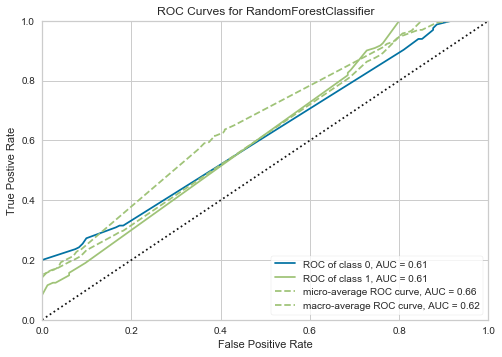

In [55]:
plot_model(tuned_rf, plot = 'auc')

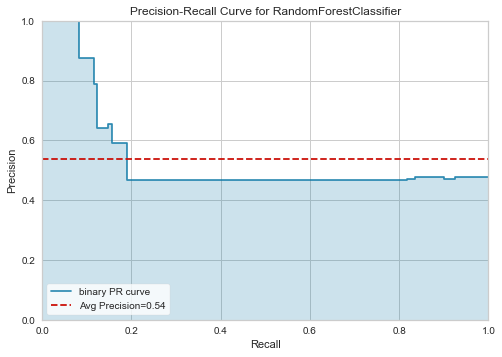

In [56]:
plot_model(tuned_rf, plot = 'pr')

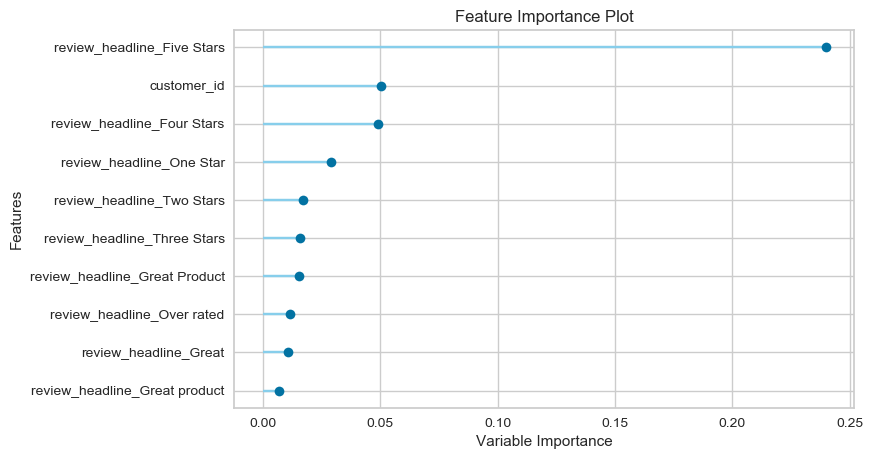

In [57]:
plot_model(tuned_rf, plot='feature')

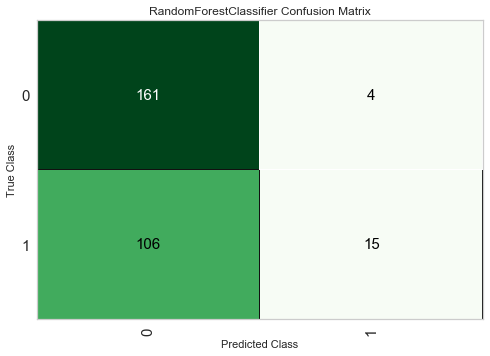

In [58]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [59]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [60]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6154,0.6149,0.124,0.7895,0.2143,0.1124,0.1978


In [61]:
final_rf = finalize_model(tuned_rf)

In [62]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8706,0.9817,0.6942,1.0,0.8195,0.7237,0.753


In [63]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,review_id,customer_id,review_headline,review_body,sentiment,Label,Score
0,R5QP9BEQHCHXU,14237851,cables,Cables work well and I needed some longer HDMI...,Negative,Negative,0.4078
1,R1ZG28PSYYTZ76,32189944,"Good sound, Easy to use",I haven't had it but for a few weeks. So far i...,Negative,Negative,0.3342
2,RNDE78F9PG152,28826538,Fast shipping unlike others -- Beware,"My new laptop did not support VGA cables, so I...",Negative,Negative,0.4078
3,R16PQ52CH1LPJ2,4361260,great buy!,cheap and great quality. I swear these are bet...,Negative,Negative,0.3687
4,RFJGBT2CL0BE9,52637759,Five Stars,"Item delivered on time, was as described",Negative,Negative,0.0633


In [64]:
save_model(final_rf,'Final RF Model 19Oct2020')

Transformation Pipeline and Model Succesfully Saved


In [65]:
saved_final_rf = load_model('Final RF Model 19Oct2020')

Transformation Pipeline and Model Successfully Loaded


In [66]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [67]:
new_prediction.head()

,review_id,customer_id,review_headline,review_body,sentiment,Label,Score
0,R5QP9BEQHCHXU,14237851,cables,Cables work well and I needed some longer HDMI...,Negative,Negative,0.4078
1,R1ZG28PSYYTZ76,32189944,"Good sound, Easy to use",I haven't had it but for a few weeks. So far i...,Negative,Negative,0.3342
2,RNDE78F9PG152,28826538,Fast shipping unlike others -- Beware,"My new laptop did not support VGA cables, so I...",Negative,Negative,0.4078
3,R16PQ52CH1LPJ2,4361260,great buy!,cheap and great quality. I swear these are bet...,Negative,Negative,0.3687
4,RFJGBT2CL0BE9,52637759,Five Stars,"Item delivered on time, was as described",Negative,Negative,0.0633


## TF-IDF Logistic Regression

In [68]:
df_classification['sentiment'] = df_classification['sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

In [69]:
df_classification

,review_id,customer_id,review_headline,review_body,sentiment
0,R3FCHTWDX6M0NY,43758182,Five Stars,nice!,0
1,R1GNTVXZQMKWHW,30156333,as advertised,had to build custom boxes and this worked perf...,0
2,R1UXFD06PQXGF8,47478367,I need help!,The instructions are so difficult I cant get i...,1
3,RSPOKAESK9MEY,36856462,It's a battery.,It's a battery.,0
4,R25JSD0FT6NTJC,23678831,Replaiment,I have not uses it yet but I'm sure it will wo...,1
...,...,...,...,...,...
995,R1KTTPRGHE7YE5,22356206,works as was expected,the signal splitter works as was expected. Bo...,0
996,R30TILJ5ZL5HFL,18725583,Waste of money..these are so difficult to use ...,Waste of money..these are so difficult to use ...,1
997,R2OVOU0NFCKMN0,23964464,Very good value,These cables are a very good value for the mon...,0
998,R37NYTXLHYG5JC,29414779,The flex USB keeps my embroidery dongle from t...,The flex USB keeps my embroidery dongle from t...,0


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_classification['review_body'], df_classification['sentiment'], random_state = 0)
print('X_train first entry: \n\n', X_train[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry: 

 nice!


X_train shape:  (750,)


In [71]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [72]:
vect.get_feature_names()[::2000]

['00', 'forum', 'say']

In [73]:
len(vect.get_feature_names())

5238

In [74]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<750x5238 sparse matrix of type '<class 'numpy.int64'>'
	with 34164 stored elements in Compressed Sparse Row format>

In [75]:
X_train_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.7136561021453107


In [78]:
import numpy as np
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs: 
['best' 'perfect' 'used' 'great' 'take' 'easy' 'any' 'highly' 'perfectly'
 'works']

Largest Coefs: 
['not' 'delivery' 'didn' 'however' 'wish' 'does' 'poor' 'ok' 'advertised'
 'bit']



In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names())

1115

In [80]:
X_train_vectorized = vect.transform(X_train)
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.7361462181606068


In [81]:
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
print('Smallest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest Tfidf: 
['updated' 'menu' 'shocked' 'today' 'modes' '16' 'tech' 'example' 'users'
 'background']

Largest Tfidf: 
['wonderful' 'nice' 'excellent' 'amazing' 'good' 'product' 'perfect' 'ok'
 'great' 'br']



In [82]:
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

2223

In [83]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.7271696156588242


In [84]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:10]))
print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-11:-1]))

Smallest Coef: 
['perfect' 'best' 'great' 'used' 'take' 'easy' 'any' 'not the' 'how'
 'perfectly']

Largest Coef: 
['delivery' 'not' 'bit' 'ok' 'the price' 'long' 'wrong' 'good product'
 'channels' 'dont']



In [85]:
data_unseen['Prediction'] = model.predict(vect.transform(data_unseen['review_body']))
data_unseen['Prediction'] = data_unseen['Prediction'].apply(lambda x: 'Positive' if x == 1 else 'Negative')

In [86]:
data_unseen.head()

,review_id,customer_id,review_headline,review_body,sentiment,Prediction
0,R5QP9BEQHCHXU,14237851,cables,Cables work well and I needed some longer HDMI...,Negative,Negative
1,R1ZG28PSYYTZ76,32189944,"Good sound, Easy to use",I haven't had it but for a few weeks. So far i...,Negative,Negative
2,RNDE78F9PG152,28826538,Fast shipping unlike others -- Beware,"My new laptop did not support VGA cables, so I...",Negative,Negative
3,R16PQ52CH1LPJ2,4361260,great buy!,cheap and great quality. I swear these are bet...,Negative,Negative
4,RFJGBT2CL0BE9,52637759,Five Stars,"Item delivered on time, was as described",Negative,Negative


## Confusion Matrix

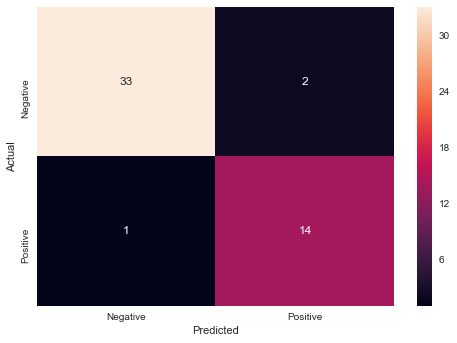

In [87]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    data_unseen['sentiment'],
        'y_Predicted': data_unseen['Prediction']
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()